In [151]:
!pip install scikit-plot

In [152]:
!pip install tslearn

In [153]:
!pip install pyts

In [154]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import random_projection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from pyts.metrics import dtw as dtw2

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
#features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Loading Training Sets

In [157]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
#X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [158]:
body_acc_x_train = pd.read_csv('body_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [159]:
body_acc_y_train = pd.read_csv('body_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [160]:
body_acc_z_train = pd.read_csv('body_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [161]:
body_gyro_x_train = pd.read_csv('body_gyro_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)
#y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = body_gyro_x_train
#train['Activity'] = y_train
#train['ActivityName'] = y_train_labels

In [162]:
body_gyro_y_train = pd.read_csv('body_gyro_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [163]:
body_gyro_z_train = pd.read_csv('body_gyro_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [164]:
total_acc_x_train = pd.read_csv('total_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [165]:
total_acc_y_train = pd.read_csv('total_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [166]:
total_acc_z_train = pd.read_csv('total_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

# Loading Test Sets

In [167]:
X_test = pd.read_csv('X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
#y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train01 = X_test
#train01['Activity'] = y_test

In [168]:
body_acc_x_test = pd.read_csv('body_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [169]:
body_acc_y_test = pd.read_csv('body_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [170]:
body_acc_z_test = pd.read_csv('body_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [171]:
body_gyro_x_test = pd.read_csv('body_gyro_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [172]:
body_gyro_y_test = pd.read_csv('body_gyro_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [173]:
body_gyro_z_test = pd.read_csv('body_gyro_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [174]:
total_acc_x_test = pd.read_csv('total_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [175]:
total_acc_y_test = pd.read_csv('total_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [176]:
total_acc_z_test = pd.read_csv('total_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [177]:
#dataset con varianza più alta
body_acc_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.003374,-0.002858,-0.001708,-0.000536,0.000333,0.000480,-0.000289,-0.001002,-0.000909,-0.000574,...,-0.000798,0.000131,0.000343,0.000431,0.000650,0.000752,0.001230,0.000948,0.000916,0.001978
std,0.198317,0.197407,0.197976,0.196811,0.195771,0.196652,0.195381,0.194239,0.193354,0.196055,...,0.191265,0.191452,0.191714,0.193405,0.194176,0.194513,0.195691,0.196523,0.197047,0.199408
min,-0.857863,-0.897771,-0.975056,-0.984342,-0.886248,-0.830093,-0.835363,-0.879751,-0.955099,-1.027935,...,-1.038524,-0.756240,-1.019879,-0.828062,-0.864435,-0.746925,-0.897870,-0.865697,-0.750321,-0.795426
25%,-0.038449,-0.037463,-0.036089,-0.033924,-0.033026,-0.035838,-0.034997,-0.032398,-0.034113,-0.033094,...,-0.022469,-0.023967,-0.022285,-0.021040,-0.023009,-0.023871,-0.024126,-0.022968,-0.024064,-0.023289
50%,-0.000718,-0.000747,-0.000624,-0.000658,-0.000719,-0.000827,-0.000762,-0.000831,-0.000746,-0.000697,...,-0.000596,-0.000646,-0.000608,-0.000477,-0.000545,-0.000575,-0.000617,-0.000460,-0.000694,-0.000622
75%,0.008661,0.008745,0.008930,0.008600,0.008426,0.008191,0.008751,0.008574,0.008221,0.008555,...,0.006514,0.006619,0.006823,0.006992,0.006615,0.006518,0.006584,0.007144,0.006665,0.006828
max,1.133144,1.091050,1.097443,1.046354,1.107588,1.057651,1.238608,1.049933,1.101743,1.056121,...,1.127268,1.132387,1.156435,1.133764,1.089165,1.128485,1.082167,1.180790,1.155468,1.087837


In [178]:
std_baccx = body_acc_x_train.std()
std_baccy = body_acc_y_train.std()
std_baccz = body_acc_z_train.std()
std_bgyrox = body_gyro_x_train.std()
std_bgyroy = body_gyro_y_train.std()
std_bgyroz = body_gyro_z_train.std()
std_totaccx = total_acc_x_train.std()
std_totaccy = total_acc_y_train.std()
std_totaccz = total_acc_z_train.std()

In [179]:
print('bacc_x', std_baccx.mean())
print('bacc_y', std_baccy.mean())
print('bacc_z', std_baccz.mean())
print('bgyro_x', std_bgyrox.mean())
print('bgyro_y', std_bgyroy.mean())
print('bgyro_z', std_bgyroz.mean())
print('totacc_x', std_totaccx.mean())
print('totacc_y', std_totaccy.mean())
print('totacc_z', std_totaccz.mean())

bacc_x 0.19482892669749152
bacc_y 0.12240050717841242
bacc_z 0.10680715788956446
bgyro_x 0.4067296422795279
bgyro_y 0.38175873417057304
bgyro_z 0.25570864936282
totacc_x 0.41413047027078664
totacc_y 0.3910152844312498
totacc_z 0.35778355912457643


In [180]:
print('bgyro_x', std_bgyrox.var())
print('totacc_x', std_totaccx.var())
print('totacc_y', std_totaccy.var())

bgyro_x 7.779602430478292e-05
totacc_x 3.244924674966347e-06
totacc_y 1.9207174505528415e-06


In [181]:
for i in range(len(total_acc_x_train)):
    if body_gyro_x_train.iloc[i][127] > 4 or body_gyro_x_train.iloc[i][127] < -3.3:
        print(body_gyro_x_train.iloc[i][127])
        print('row:', i)
        print('----------------')

-3.395589
row: 3750
----------------
4.077152
row: 3915
----------------
-3.658334
row: 4871
----------------


# Data preparation

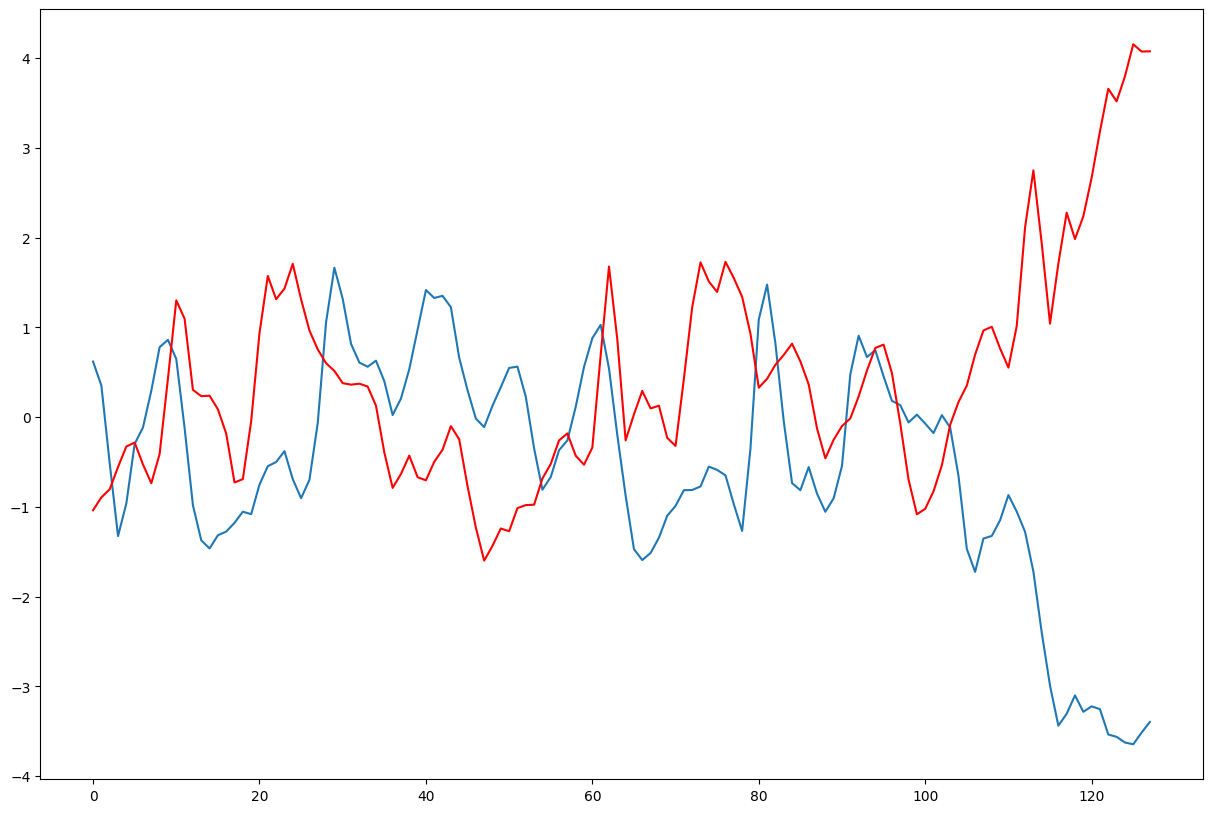

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3750])
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

# Shapelets

In [ ]:
#from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [ ]:
n_ts, ts_sz = body_gyro_x_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 7352
ts_sz 128
n_classes 6
shapelet_sizes {12: 6}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [ ]:
shp_clf.fit(body_gyro_x_train, y_train)

Epoch 1/200
29/29 [==============================] - 2s 16ms/step - loss: 1.8993 - categorical_accuracy: 0.0502 - categorical_crossentropy: 1.8350
Epoch 2/200
29/29 [==============================] - 0s 14ms/step - loss: 1.8750 - categorical_accuracy: 0.0345 - categorical_crossentropy: 1.8120
Epoch 3/200
29/29 [==============================] - 0s 15ms/step - loss: 1.8546 - categorical_accuracy: 0.1640 - categorical_crossentropy: 1.7928
Epoch 4/200
29/29 [==============================] - 0s 16ms/step - loss: 1.8373 - categorical_accuracy: 0.1700 - categorical_crossentropy: 1.7765
Epoch 5/200
29/29 [==============================] - 1s 22ms/step - loss: 1.8224 - categorical_accuracy: 0.1683 - categorical_crossentropy: 1.7626
Epoch 6/200
29/29 [==============================] - 1s 23ms/step - loss: 1.8095 - categorical_accuracy: 0.1676 - categorical_crossentropy: 1.7506
Epoch 7/200
29/29 [==============================] - 1s 24ms/step - loss: 1.7982 - categorical_accuracy: 0.1669 - cate

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, verbose=1,
                  weight_regularizer=0.01)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predicted_locations = shp_clf.locate(body_gyro_x_train)

29/29 [==============================] - 1s 12ms/step


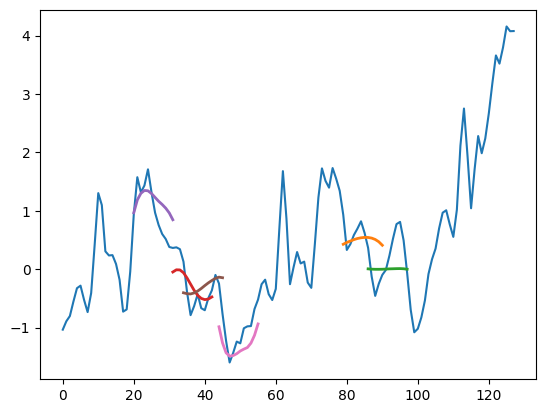

In [ ]:
ts_id = 3915
plt.figure()
n_shapelets = sum(shapelet_sizes.values())

plt.plot(body_gyro_x_train.T[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

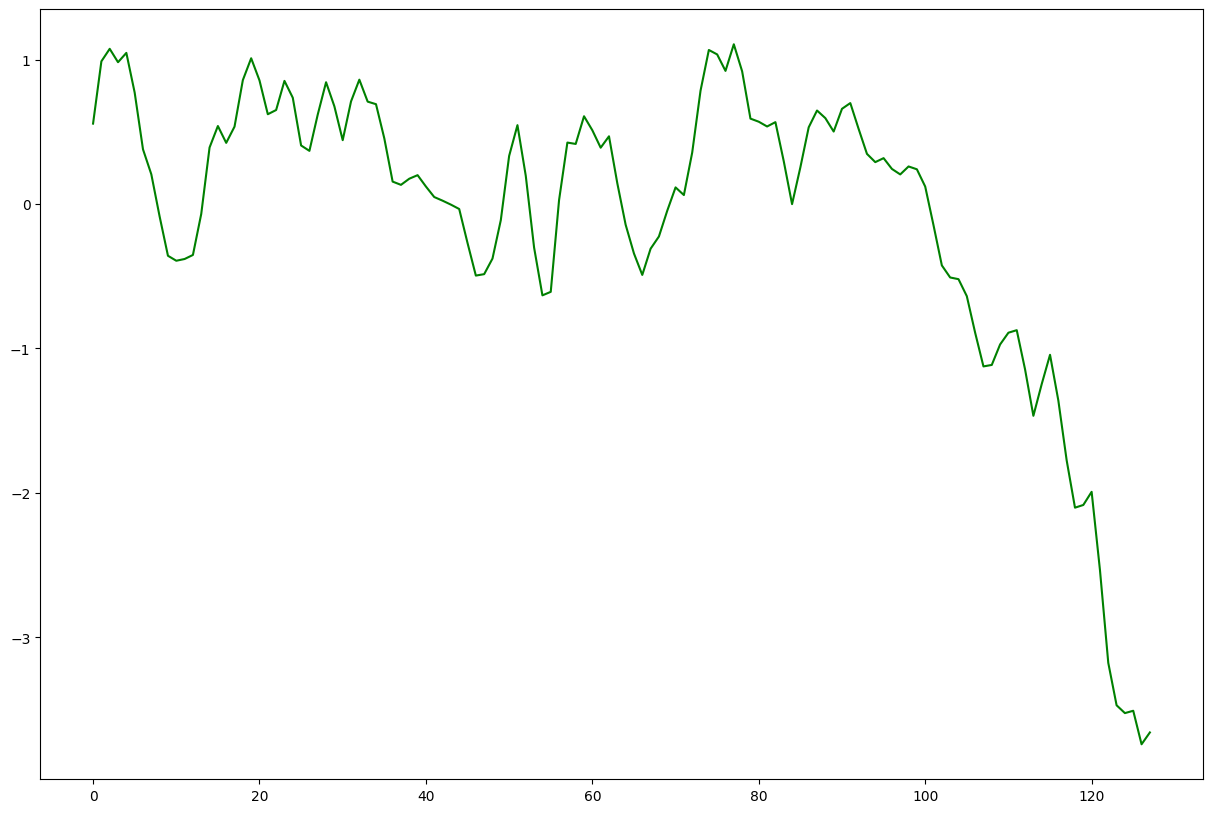

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[4871], color='green')
plt.show()

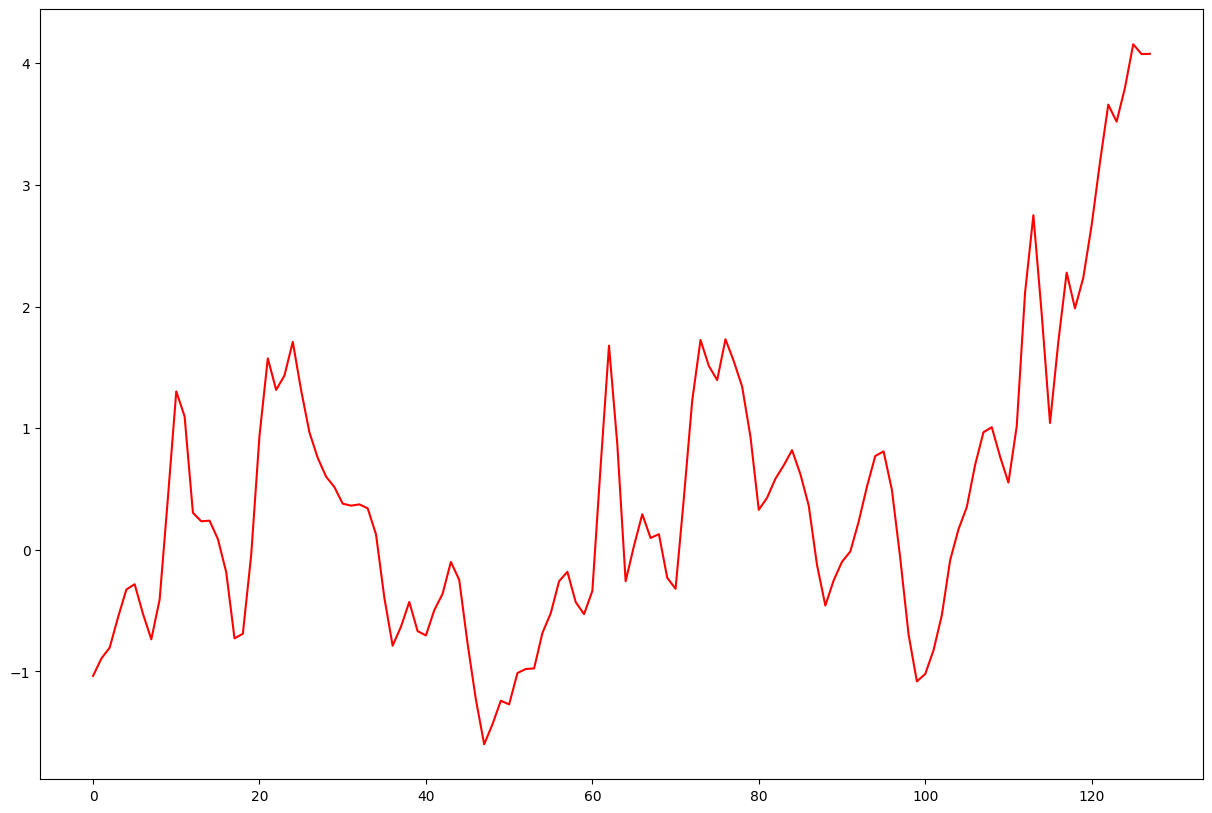

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

In [ ]:
!pip install matrixprofile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.6/331.6 kB 3.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from matrixprofile import *
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

ModuleNotFoundError: ignored

# Transformations

### Transformation I: Offset Translation

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3750] - body_gyro_x_train.T[3750].mean())
plt.plot(body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].mean())
plt.show()

### Transformation II: Amplitude Scaling

In [ ]:
plt.figure(figsize=(15,10))
plt.plot((body_gyro_x_train.T[3750] - body_gyro_x_train.T[3750].mean())/body_gyro_x_train.T[3750].std())
plt.plot((body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].mean())/body_gyro_x_train.T[3915].std())
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(body_gyro_x_train.T[3750].values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(body_gyro_x_train.T[3915].values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

# Clustering

# Preparazione delle classi

In [ ]:
body_gyro_x_train = pd.read_csv('body_gyro_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = body_gyro_x_train
body_gyro_x_train['Activity'] = y_train
body_gyro_x_train['ActivityName'] = y_train_labels

In [ ]:
sitting_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'SITTING':
        sitting_train.append(i)

standing_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'STANDING':
        standing_train.append(i)

laying_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'LAYING':
        laying_train.append(i)

In [ ]:
droptrian = sitting_train + standing_train + laying_train

In [ ]:
droptrian

[27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 875,
 876,
 877,
 878,
 879,
 880,
 881,
 882,
 883,
 884,
 885,
 886,
 887,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043

In [ ]:
body_gyro_x_train_sbilanciato = body_gyro_x_train.drop(droptrian)

In [ ]:
body_gyro_x_train_sbilanciato

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,Activity,ActivityName
78,-0.562411,-0.506874,-0.777167,-1.317128,-1.485695,-1.357972,-1.143074,-0.789846,-0.534126,-0.424622,...,0.081963,0.552081,0.861181,0.598609,0.212792,0.077756,-0.035121,-0.022209,1,WALKING
79,-0.563775,0.142212,0.562869,0.469666,0.361988,0.276232,-0.094826,-0.377850,-0.345064,-0.214542,...,0.239230,0.557351,0.850572,0.853804,0.892525,0.897483,0.756824,0.735719,1,WALKING
80,0.297386,0.644423,0.884905,0.911878,0.816883,0.822600,0.659113,0.476545,0.488207,0.459096,...,0.342552,0.372020,0.469384,0.746403,0.896964,0.872712,0.615928,0.240994,1,WALKING
81,0.619784,0.495909,0.477878,0.375607,0.352125,0.423482,0.489886,0.550503,0.597166,0.685611,...,-0.093727,-0.774953,-1.303948,-1.413177,-0.925724,-0.057964,0.543332,0.839719,1,WALKING
82,0.007298,-0.226077,-0.799019,-1.505011,-1.605516,-0.906175,0.176592,0.881056,0.838081,0.614854,...,-0.556343,-0.567772,-0.626301,-0.618758,-0.476247,-0.484642,-0.269121,0.001161,1,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.503212,-0.473844,-0.249069,-0.027994,-0.059873,-0.084260,0.130789,0.381967,0.609053,0.830623,...,0.980709,1.013773,1.046258,0.966485,0.740581,0.512633,0.312086,0.169856,2,WALKING_UPSTAIRS
7348,-0.174347,0.015408,0.087648,-0.032994,-0.170081,-0.051721,0.098896,0.208322,0.402766,0.516898,...,-0.297251,-0.406554,-0.523906,-0.586418,-0.550446,-0.506336,-0.444789,-0.378067,2,WALKING_UPSTAIRS
7349,0.118356,0.137890,0.177420,0.169504,0.167615,0.166898,0.142442,0.136183,0.100858,0.149397,...,-0.637173,-0.562788,-0.690228,-0.694147,-0.704308,-0.760954,-0.677963,-0.627501,2,WALKING_UPSTAIRS
7350,-0.378872,-0.373888,-0.330125,-0.344638,-0.382985,-0.405633,-0.499875,-0.606124,-0.585213,-0.328248,...,-0.123552,-0.228810,-0.211935,-0.286205,-0.423730,-0.425461,-0.475547,-0.412959,2,WALKING_UPSTAIRS


In [ ]:
body_gyro_x_train_sbilanciato = body_gyro_x_train_sbilanciato.drop(columns=['Activity'])

In [ ]:
body_gyro_x_train_sbilanciato = body_gyro_x_train_sbilanciato.drop(columns=['ActivityName'])

In [ ]:
body_gyro_x_train_sbilanciato

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
78,-0.562411,-0.506874,-0.777167,-1.317128,-1.485695,-1.357972,-1.143074,-0.789846,-0.534126,-0.424622,...,-0.036173,-0.089256,0.081963,0.552081,0.861181,0.598609,0.212792,0.077756,-0.035121,-0.022209
79,-0.563775,0.142212,0.562869,0.469666,0.361988,0.276232,-0.094826,-0.377850,-0.345064,-0.214542,...,-0.312779,-0.078742,0.239230,0.557351,0.850572,0.853804,0.892525,0.897483,0.756824,0.735719
80,0.297386,0.644423,0.884905,0.911878,0.816883,0.822600,0.659113,0.476545,0.488207,0.459096,...,0.354583,0.259290,0.342552,0.372020,0.469384,0.746403,0.896964,0.872712,0.615928,0.240994
81,0.619784,0.495909,0.477878,0.375607,0.352125,0.423482,0.489886,0.550503,0.597166,0.685611,...,0.501165,0.317108,-0.093727,-0.774953,-1.303948,-1.413177,-0.925724,-0.057964,0.543332,0.839719
82,0.007298,-0.226077,-0.799019,-1.505011,-1.605516,-0.906175,0.176592,0.881056,0.838081,0.614854,...,0.044462,-0.248079,-0.556343,-0.567772,-0.626301,-0.618758,-0.476247,-0.484642,-0.269121,0.001161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.503212,-0.473844,-0.249069,-0.027994,-0.059873,-0.084260,0.130789,0.381967,0.609053,0.830623,...,0.629654,0.863918,0.980709,1.013773,1.046258,0.966485,0.740581,0.512633,0.312086,0.169856
7348,-0.174347,0.015408,0.087648,-0.032994,-0.170081,-0.051721,0.098896,0.208322,0.402766,0.516898,...,-0.200444,-0.199221,-0.297251,-0.406554,-0.523906,-0.586418,-0.550446,-0.506336,-0.444789,-0.378067
7349,0.118356,0.137890,0.177420,0.169504,0.167615,0.166898,0.142442,0.136183,0.100858,0.149397,...,-0.978920,-0.807291,-0.637173,-0.562788,-0.690228,-0.694147,-0.704308,-0.760954,-0.677963,-0.627501
7350,-0.378872,-0.373888,-0.330125,-0.344638,-0.382985,-0.405633,-0.499875,-0.606124,-0.585213,-0.328248,...,-0.447757,-0.249343,-0.123552,-0.228810,-0.211935,-0.286205,-0.423730,-0.425461,-0.475547,-0.412959


## Shape-based Clustering

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sse_list = []

for k in range(1, 31):
    kmeans = TimeSeriesKMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(body_gyro_x_train_sbilanciato)
    sse_list.append( kmeans.inertia_ )

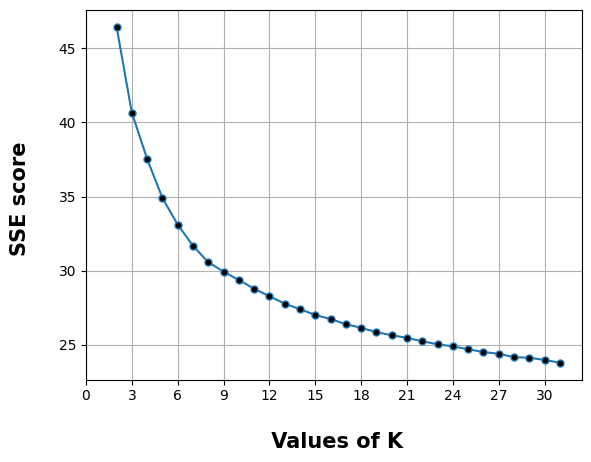

In [ ]:
values = [0,3,6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(2, len(sse_list)+2), sse_list, marker='.', markersize=10, markerfacecolor='black')
plt.ylabel('SSE score \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

In [ ]:
values = [0,3,4 ,5, 6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = TimeSeriesKMeans(n_clusters=num_clusters, metric='dtw')
    kmeans.fit(body_gyro_x_train_sbilanciato)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(body_gyro_x_train_sbilanciato, kmeans.labels_))

plt.plot(range_n_clusters,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 31):
    kmeans_model = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", max_iter=100, random_state=0)
    kmeans_model.fit(body_gyro_x_train_sbilanciato)
    inertia_list.append(kmeans_model.inertia_)

# plot the inertia curve
plt.plot(range(1,31),inertia_list)
plt.scatter(range(1,31),inertia_list)
#plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [ ]:
km_eu = TimeSeriesKMeans(n_clusters=11, metric="euclidean", max_iter=100, random_state=0)
km_eu.fit(body_gyro_x_train_sbilanciato)

In [ ]:
km_eu.cluster_centers_.shape

In [ ]:
plt.plot(np.squeeze(km_eu.cluster_centers_).T)
plt.show()

In [ ]:
np.unique(km_eu.labels_, return_counts=True)

In [ ]:
km_eu.inertia_

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=11, metric="dtw", max_iter=100, random_state=0)
km_dtw.fit(body_gyro_x_train_sbilanciato)

In [ ]:
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()

In [ ]:

np.unique(km_dtw.labels_, return_counts=True)

In [ ]:
km_dtw.inertia_

In [109]:
km_softdtw = TimeSeriesKMeans(n_clusters=11, metric="softdtw", max_iter=100, random_state=0)
km_softdtw.fit(body_gyro_x_train_sbilanciato)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(np.squeeze(km_softdtw.cluster_centers_).T)
plt.show()

In [ ]:
km_softdtw.inertia_

In [ ]:
np.unique(km_softdtw.labels_, return_counts=True)

##AGGLMERATIVE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=6, linkage='single')
clustering.fit(body_gyro_x_train_sbilanciato)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [ ]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(clustering.labels_)

0    3278
2       2
1       2
3       1
4       1
5       1
dtype: int64

In [ ]:
def plot_dendrogram(clustering, **kwargs):
    """
    Funzione per la visualizzazione del dendrogramma del clustering gerarchico.
    Utilizza la libreria scipy per calcolare il dendrogramma.

    Parametri:
    - clustering: oggetto di clustering gerarchico già addestrato
    - **kwargs: argomenti opzionali da passare alla funzione dendrogram()
    """
    # Calcola la matrice di linkage utilizzando scipy
    linkage_matrix = linkage(clustering.children_)
    dendrogram(linkage_matrix, **kwargs)
from scipy.cluster.hierarchy import linkage, dendrogram

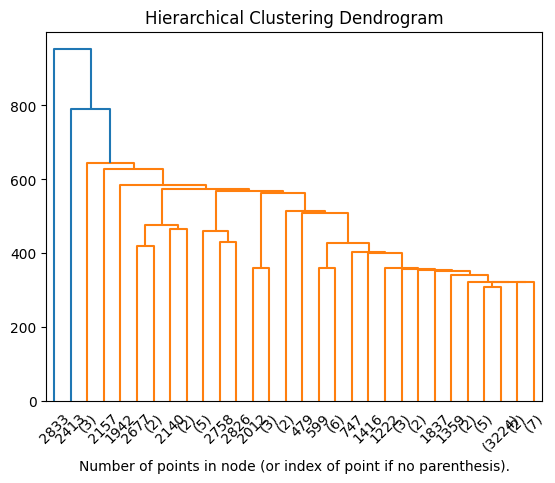

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering.labels_))
print('silhouette', silhouette_score(body_gyro_x_train_sbilanciato, clustering.labels_))

0    3278
2       2
1       2
3       1
4       1
5       1
dtype: int64
silhouette 0.42322799343810374


####COMPLETE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering1 = AgglomerativeClustering(n_clusters=4, linkage='complete')
clustering1.fit(body_gyro_x_train_sbilanciato)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
clustering1.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
pd.value_counts(clustering.labels_)

0    3278
2       2
1       2
3       1
4       1
5       1
dtype: int64

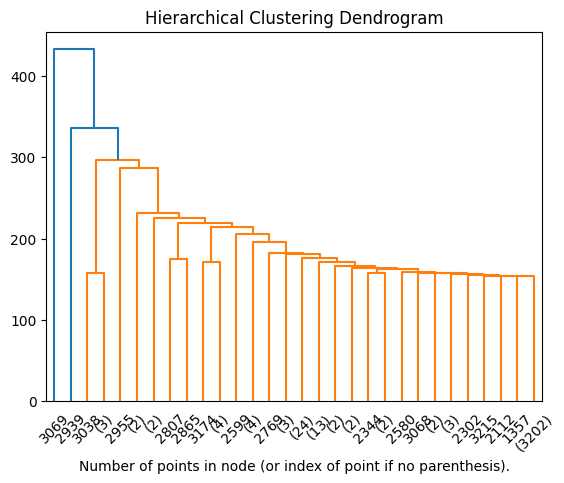

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering1, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering1.labels_))
print('silhouette', silhouette_score(body_gyro_x_train_sbilanciato, clustering1.labels_))

1    2433
0     841
2      10
3       1
dtype: int64
silhouette 0.05856578092571881


####AVERAGE

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering2 = AgglomerativeClustering(n_clusters=6, linkage='average')
clustering2.fit(body_gyro_x_train_sbilanciato)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [ ]:
clustering2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pd.value_counts(clustering2.labels_)

0    3272
1       5
2       4
5       2
3       1
4       1
dtype: int64

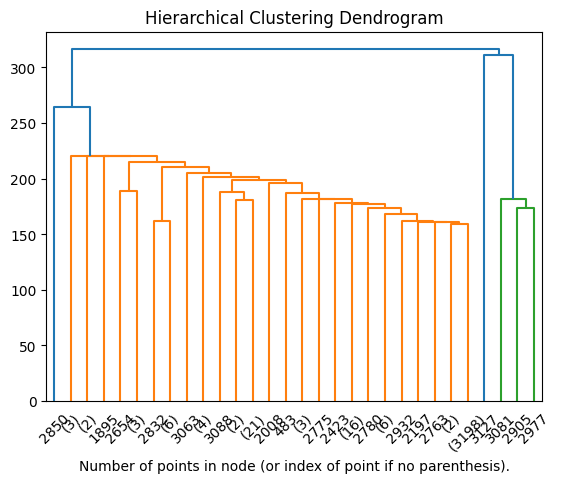

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering2, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering2.labels_))
print('silhouette', silhouette_score(body_gyro_x_train_sbilanciato, clustering.labels_))

0    3272
1       5
2       4
5       2
3       1
4       1
dtype: int64
silhouette 0.42322799343810374


####ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering3 = AgglomerativeClustering(n_clusters=6, linkage='ward')
clustering3.fit(body_gyro_x_train_sbilanciato)

AgglomerativeClustering(n_clusters=6)

In [ ]:
clustering3.labels_

array([3, 0, 5, ..., 4, 3, 2])

In [ ]:
pd.value_counts(clustering3.labels_)

0    791
2    742
5    536
3    518
4    422
1    276
dtype: int64

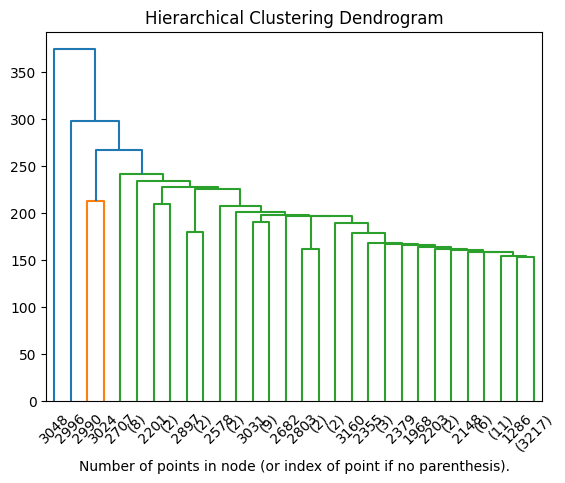

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clustering3, truncate_mode="lastp")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(pd.value_counts(clustering3.labels_))
print('silhouette', silhouette_score(body_gyro_x_train_sbilanciato, clustering.labels_))

0    791
2    742
5    536
3    518
4    422
1    276
dtype: int64
silhouette 0.42322799343810374
